In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo para gráficos
sns.set_theme(style="whitegrid")


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Pré-visualização dos Dados

In [2]:
# Leitura do arquivo CSV
df = pd.read_csv("miro_dados_limpos_desde_janeiro.csv")

In [3]:
# Exibe informações gerais do dataset
print("\nInformações sobre o dataset:")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")


Informações sobre o dataset:
Número de linhas: 32
Número de colunas: 29


In [4]:
# Cálculo manual do CPC (todos)
df["CPC (todos)"] = df["Valor usado (BRL)"] / df["Cliques (todos)"]

# Exibindo os resultados em uma tabela organizada com valores arredondados
print("\nPrimeiras linhas de valores calculados de CPC (todos):")
display(
    df[["Nome do anúncio", "Valor usado (BRL)", "Cliques (todos)", "CPC (todos)"]].round(2)
)



Primeiras linhas de valores calculados de CPC (todos):


,Nome do anúncio,Valor usado (BRL),Cliques (todos),CPC (todos)
0,AD 01 - VÍDEO STORIES - 04/04/24,641.46,109,5.88
1,AD 01 - CARROSSEL - 18/06/2024,640.82,481,1.33
2,AD 01 - CARROSSEL FEED - 05/06/2024,562.85,625,0.90
3,AD 01 - VIDEO - 16/09/2024,340.81,159,2.14
4,AD 01 - VIDEO - 01/10/2024,297.95,124,2.40
5,AD 01 - IMAGEM STORIES,268.77,190,1.41
6,AD - 05 - CARROSSEL ST - 24/05/2024,222.88,283,0.79
7,AD 01 - VIDEO - 16/09/2024,188.24,103,1.83
8,AD 01 - CARROSSEL,169.82,89,1.91
9,AD 05 - CARROSSEL ST - 24/05/2024,140.26,180,0.78


In [5]:
# Cálculo manual da CTR (Click-Through Rate)
df["CTR"] = (df["Cliques (todos)"] / df["Impressões"]) * 100

# Exibindo os resultados em uma tabela organizada com valores arredondados
print("\n Primeiras linhas de valores calculados de CTR:")
display(
    df[["Nome do anúncio", "Cliques (todos)", "Impressões", "CTR"]]
    .round(2)
)


 Primeiras linhas de valores calculados de CTR:


,Nome do anúncio,Cliques (todos),Impressões,CTR
0,AD 01 - VÍDEO STORIES - 04/04/24,109,172197,0.06
1,AD 01 - CARROSSEL - 18/06/2024,481,253308,0.19
2,AD 01 - CARROSSEL FEED - 05/06/2024,625,409103,0.15
3,AD 01 - VIDEO - 16/09/2024,159,178060,0.09
4,AD 01 - VIDEO - 01/10/2024,124,159631,0.08
5,AD 01 - IMAGEM STORIES,190,27254,0.70
6,AD - 05 - CARROSSEL ST - 24/05/2024,283,26300,1.08
7,AD 01 - VIDEO - 16/09/2024,103,63471,0.16
8,AD 01 - CARROSSEL,89,12413,0.72
9,AD 05 - CARROSSEL ST - 24/05/2024,180,15513,1.16


# Estatísticas Descritivas do `.describe()`

1.  **count**:

    - **Definição**: Conta o número de entradas válidas (não nulas) em cada coluna.
    - **Cálculo**: Número total de valores presentes em uma coluna, ignorando valores ausentes (`NaN`).
    - **Uso**: Útil para verificar a quantidade de dados disponíveis e se há muitas lacunas em uma coluna.

2.  **mean** (Média):

    - **Definição**: A média aritmética dos valores na coluna.
    - **Cálculo**: Soma de todos os valores dividida pelo número total de valores não nulos.
    - **Uso**: Indica o valor médio de uma coluna, ajudando a identificar o centro da distribuição dos dados.

3.  **std** (Desvio Padrão):

    - **Definição**: Mede a dispersão dos valores em relação à média.
    - **Cálculo**: Raiz quadrada da média dos quadrados das diferenças entre cada valor e a média.
    - **Uso**: Indica a variabilidade dos dados; quanto maior o desvio padrão, mais dispersos estão os dados em torno da média.

4.  **min** (Valor Mínimo):

    - **Definição**: O menor valor encontrado na coluna.
    - **Cálculo**: Simplesmente o valor mais baixo da série.
    - **Uso**: Mostra o limite inferior dos valores e ajuda a identificar possíveis outliers (valores muito baixos).

5.  **25%** (1º Quartil):

    - **Definição**: O valor abaixo do qual 25% dos dados estão situados.
    - **Cálculo**: Valor que divide os 25% menores valores dos restantes.
    - **Uso**: Indica o limite inferior do intervalo interquartil e ajuda a entender a dispersão dos dados na parte baixa.

6.  **50%** (Mediana ou 2º Quartil):

    - **Definição**: O valor central da distribuição.
    - **Cálculo**: O valor no meio dos dados quando organizados em ordem crescente.
    - **Uso**: É uma medida de tendência central mais robusta que a média, pois não é afetada por outliers.

7.  **75%** (3º Quartil):

    - **Definição**: O valor abaixo do qual 75% dos dados estão situados.
    - **Cálculo**: Valor que divide os 75% menores valores dos restantes.
    - **Uso**: Indica o limite superior do intervalo interquartil, ajudando a identificar a dispersão dos dados na parte alta.

8.  **max** (Valor Máximo):
    - **Definição**: O maior valor encontrado na coluna.
    - **Cálculo**: Simplesmente o valor mais alto da série.
    - **Uso**: Mostra o limite superior dos valores e ajuda a identificar possíveis outliers (valores muito altos).

Essas estatísticas fornecem uma visão abrangente da distribuição dos dados, destacando o centro (média e mediana), a dispersão (desvio padrão e quartis) e os limites (mínimo e máximo). Em uma análise, essas métricas ajudam a identificar a forma geral da distribuição dos dados, outliers e o intervalo típico dos valores.


In [6]:
# Exibição de estatísticas descritivas das métricas de desempenho para contexto
metricas_desempenho = [
    "Alcance",
    "Impressões",
    "Frequência",
    "Valor usado (BRL)",
    "Resultados",
    "Custo por resultado",
    "CPM (custo por 1.000 impressões)",
    "CTR",
    "CPC (todos)",
    "Cliques (todos)",
]

print("Estatísticas descritivas das métricas de desempenho:")
display(df[metricas_desempenho].describe().round(2))

Estatísticas descritivas das métricas de desempenho:


,Alcance,Impressões,Frequência,Valor usado (BRL),Resultados,Custo por resultado,CPM (custo por 1.000 impressões),CTR,CPC (todos),Cliques (todos)
count,32.00,32.00,32.00,32.00,24.00,24.00,32.00,32.00,32.00,32.00
mean,24081.28,49553.72,1.76,134.58,29301.54,4.36,7.03,0.53,inf,88.75
std,40344.86,91115.87,0.77,183.82,45161.39,3.57,4.49,0.51,NaN,141.68
min,61.00,63.00,1.03,0.61,1.00,0.02,1.38,0.00,0.50,0.00
25%,662.50,1027.75,1.22,10.11,18.75,2.11,2.41,0.09,1.07,5.75
50%,5370.50,11192.50,1.34,61.60,5087.00,3.38,9.04,0.34,1.73,27.00
75%,28923.50,45023.50,2.17,174.42,38210.25,4.78,10.23,0.90,2.41,109.75
max,167158.00,409103.00,4.07,641.46,167158.00,13.09,15.79,2.12,inf,625.00


# Cálculo de Outliers

**1. O que são outliers?**

Outliers são valores em uma série de dados que se destacam significativamente da média ou do padrão observado, sendo muito mais altos ou baixos que a maioria dos demais. Eles podem ser causados por diversas variáveis, como erros de entrada, características particulares do dado, ou fatores excepcionais em campanhas de marketing. Em suma, outliers são valores que desequilibram o dataframe e comprometem a capacidade de extrair insights com base nos dados


**2. Como outliers ajudam em diagnósticos para marketing digital e tráfego pago?**

No contexto de marketing digital e campanhas de tráfego pago, outliers ajudam a identificar campanhas ou anúncios que estão performando de maneira atípica, tanto positiva quanto negativamente. Isso permite avaliar estratégias específicas e fazer ajustes necessários. Por exemplo, anúncios com impressões ou alcance excessivamente altos podem estar drenando o orçamento, enquanto um CPC (todos)(Custo por Clique) acima da média pode indicar que a segmentação precisa de revisão.


**3. Análise dos resultados de forma simples**

**Alcance**: Três anúncios apresentaram valores fora do padrão, com valores entre R$ 95.498 e R$ 167.158, muito acima do limite superior de R$ 83.631,12.

**Impressões**: Cinco anúncios apresentaram entre R$ 159.631 e R$ 409.103, acima do limite de R$ 117.899,62.

**Frequência**: Dois anúncios tiveram uma frequência superior a 3,60, com valores entre 3,74 e 4,07.

**Valor usado (BRL)**: Em três anúncios, o valor investido superou R$ 420,90, com um mínimo de R$ 562,85 e máximo de R$ 641,46.

**Resultados**: Três anúncios ficaram acima do limite de 95.497,50, com valores de 95.498 a 167.158.

**Custo por resultado**: Quatro anúncios apresentaram valores entre R$ 8,96 e R$ 13,09, ultrapassando o limite de R$ 8,79.

**CPC (todos)(Custo por clique no link)**: Cinco anúncios, com CPC (todos)entre R$ 14,48 e R$ 170,41, estão acima do limite de R$ 13,74.

**Cliques (todos)**: Três anúncios ultrapassaram o limite de 265,75 cliques, com valores entre 283 e 625.

**4. Insights e formas de evitar outliers**

**Insights:**

Alta frequência e CPC (todos)elevados indicam que algumas campanhas podem estar saturando o público-alvo, possivelmente gerando custo extra sem retorno proporcional.
Impressões e alcance anormais podem refletir uma exposição excessiva para o público errado ou ajustes necessários na segmentação.
Custos por resultado elevados sugerem a necessidade de ajustes no conteúdo, nas chamadas para ação, ou na segmentação para otimizar o investimento.

**Como evitar outliers:**

**Refinar segmentação:** Análises frequentes dos públicos-alvo ajudam a evitar a exibição excessiva de anúncios para as mesmas pessoas, o que pode aumentar os custos.

**Ajustar o orçamento e a frequência**: Para evitar custos elevados, ajuste o orçamento dos anúncios e limite a frequência para evitar saturação.

**Testes A/B**: Testar diferentes criativos e mensagens pode identificar rapidamente quais conteúdos geram maior interação a um menor custo.

**Monitoramento contínuo**: Acompanhar os indicadores principais (CPC (todos) (todos)   , alcance, impressões, etc.) permite ajustes rápidos, evitando que outliers persistam e prejudiquem a eficiência do orçamento.

Esses métodos permitem que as campanhas permaneçam otimizadas, minimizando gastos excessivos e maximizando os resultado

In [7]:
# Função para identificar outliers usando o método IQR sem modificar o DataFrame original
def identificar_outliers(df, colunas):
    # Cria uma cópia do DataFrame para a análise
    global df_outlier  # Define df_outlier como variável global para acesso posterior
    df_outlier = df.copy()
    print("Resumo dos outliers nas métricas de desempenho:\n")

    for coluna in colunas:
        if coluna in df_outlier.columns:
            # Tenta converter a coluna para valores numéricos, ignorando erros
            df_outlier[coluna] = pd.to_numeric(df_outlier[coluna], errors="coerce")

            # Cálculo do IQR e limite superior para outliers
            Q1 = df_outlier[coluna].quantile(0.25)
            Q3 = df_outlier[coluna].quantile(0.75)
            IQR = Q3 - Q1
            limite_superior = Q3 + 1.5 * IQR

            # Seleção dos outliers
            outliers_coluna = df_outlier[df_outlier[coluna] > limite_superior]
            num_outliers = len(outliers_coluna)

            # Exibição dos resultados de outliers para a métrica atual
            if num_outliers > 0:
                print(f"Métrica: {coluna}")
                print(f"Outliers encontrados: {num_outliers}")
                print(f"Valor mínimo de outlier: {outliers_coluna[coluna].min()}")
                print(f"Valor máximo de outlier: {outliers_coluna[coluna].max()}")
                print(f"Limite superior: {limite_superior:.2f}")
                print("Anúncios com outliers:")

                # Exibe cada anúncio individualmente
                for index, row in outliers_coluna.iterrows():
                    print(f" - {row['Nome do anúncio']}")

                print("\n" + "-" * 50 + "\n")
        else:
            print(f"Coluna '{coluna}' ignorada (não encontrada).\n")

    print("Análise concluída.")

# Exemplo de chamada da função
identificar_outliers(df, metricas_desempenho)

Resumo dos outliers nas métricas de desempenho:

Métrica: Alcance
Outliers encontrados: 4
Valor mínimo de outlier: 81964
Valor máximo de outlier: 167158
Limite superior: 71315.00
Anúncios com outliers:
 - AD 01 - CARROSSEL - 18/06/2024
 - AD 01 - CARROSSEL FEED - 05/06/2024
 - AD 01 - VIDEO - 16/09/2024
 - AD 01 - VIDEO - 01/10/2024

--------------------------------------------------

Métrica: Impressões
Outliers encontrados: 5
Valor mínimo de outlier: 159631
Valor máximo de outlier: 409103
Limite superior: 111017.12
Anúncios com outliers:
 - AD 01 - VÍDEO STORIES - 04/04/24
 - AD 01 - CARROSSEL - 18/06/2024
 - AD 01 - CARROSSEL FEED - 05/06/2024
 - AD 01 - VIDEO - 16/09/2024
 - AD 01 - VIDEO - 01/10/2024

--------------------------------------------------

Métrica: Frequência
Outliers encontrados: 2
Valor mínimo de outlier: 3.74213923
Valor máximo de outlier: 4.07239145
Limite superior: 3.60
Anúncios com outliers:
 - AD 01 - VÍDEO STORIES - 04/04/24
 - AD 01 - IMAGEM STORIES

--------

Quando analisamos os resultados de campanhas de anúncios, podemos encontrar alguns que tiveram um desempenho muito acima da média. Esses anúncios "fora da curva", chamados de **outliers**, são aqueles que se destacam em várias métricas importantes, como **alcance**, **engajamento**, **cliques** e **custo por clique**. Em vez de ignorá-los ou descartá-los, identificar e entender esses anúncios pode ser uma excelente estratégia para melhorar futuras campanhas.

### Por que analisar anúncios com desempenho excepcional?

1. **Identificar o que funciona**: Anúncios que alcançam muita gente, recebem muitos cliques ou engajam mais do que o esperado podem ter um criativo (imagem, vídeo ou texto) especialmente atrativo. Ao entender o que esses anúncios têm de diferente, conseguimos insights sobre o que chama mais atenção do público.

2. **Ajustar o público-alvo**: Se um anúncio foi entregue para o público certo, no momento certo, ele provavelmente se destacará em métricas como alcance e engajamento. Analisar esses outliers pode nos ajudar a encontrar os públicos que mais respondem aos nossos conteúdos, permitindo uma segmentação mais eficaz para futuras campanhas.

3. **Otimizar custos**: Anúncios que trazem bons resultados com custos baixos (por exemplo, um baixo custo por clique) mostram que estamos conseguindo um ótimo retorno sobre o investimento. Em vez de descartar esses dados, analisar por que esses anúncios foram tão eficientes pode nos ajudar a otimizar os gastos em campanhas futuras.

4. **Aprender com o sucesso**: Esses anúncios excepcionais são ótimos exemplos de sucesso. Em vez de olhar apenas para a média dos anúncios, focar nesses "cases de sucesso" nos dá ideias práticas para replicar e melhorar campanhas, entendendo melhor quais horários, plataformas ou tipos de conteúdo funcionam melhor.

### Conclusão

Analisar os anúncios que se destacaram em várias métricas não é apenas sobre números altos, mas sobre descobrir **o que funcionou**. Esses insights nos ajudam a criar campanhas mais eficazes, investindo nos elementos que realmente fazem a diferença para o público. Em resumo, os outliers mostram o caminho para estratégias de alto impacto e melhor desempenho.

In [8]:
# Função para compilar e exibir anúncios com desempenho excepcional (outliers) em várias métricas
def compilar_outliers_desempenho_excepcional(df_outlier, colunas):
    # Lista para armazenar índices de linhas que foram outliers em pelo menos uma métrica
    indices_outliers = set()

    # Analisar cada métrica e coletar índices de outliers
    for coluna in colunas:
        if coluna in df_outlier.columns:
            # Cálculo do IQR e limite superior para identificar outliers
            Q1 = df_outlier[coluna].quantile(0.25)
            Q3 = df_outlier[coluna].quantile(0.75)
            IQR = Q3 - Q1
            limite_superior = Q3 + 1.5 * IQR

            # Coleta de índices de outliers
            outliers_coluna = df_outlier[df_outlier[coluna] > limite_superior]
            indices_outliers.update(outliers_coluna.index)

    # Converte o conjunto de índices para uma lista
    indices_outliers = list(indices_outliers)

    # Criação de um DataFrame apenas com os anúncios que foram outliers em pelo menos uma métrica
    df_outliers_compilado = df_outlier.loc[indices_outliers]

    # Seleciona apenas as colunas de interesse para análise de desempenho
    colunas_interesse = ["Nome do anúncio", "Alcance", "Impressões", "Cliques (todos)", "Resultados", "Valor usado (BRL)"]
    display(df_outliers_compilado[colunas_interesse])

# Exemplo de chamada da função para compilar e exibir os anúncios de alta performance
compilar_outliers_desempenho_excepcional(df_outlier, metricas_desempenho)

,Nome do anúncio,Alcance,Impressões,Cliques (todos),Resultados,Valor usado (BRL)
0,AD 01 - VÍDEO STORIES - 04/04/24,42284,172197,109,25807.0,641.46
1,AD 01 - CARROSSEL - 18/06/2024,120917,253308,481,120917.0,640.82
2,AD 01 - CARROSSEL FEED - 05/06/2024,167158,409103,625,167158.0,562.85
3,AD 01 - VIDEO - 16/09/2024,95498,178060,159,95498.0,340.81
4,AD 01 - VIDEO - 01/10/2024,81964,159631,124,81964.0,297.95
5,AD 01 - IMAGEM STORIES,7283,27254,190,30.0,268.77
6,AD - 05 - CARROSSEL ST - 24/05/2024,9216,26300,283,66.0,222.88
8,AD 01 - CARROSSEL,5727,12413,89,15.0,169.82
12,AD 01 - CARROSSEL,4280,9848,109,10.0,118.99
21,AD 01 - IMAGEM STORIES,885,1139,8,1.0,13.09


# Visualização de Distribuições Alcance e Custo por Resultado

## Histograma 

Este gráfico mostra a distribuição de alcance de anúncios, ou seja, quantas pessoas cada anúncio conseguiu alcançar. A maioria dos anúncios (cerca de 20) teve um alcance baixo, abaixo de 25.000 pessoas. À medida que o alcance aumenta, o número de anúncios diminui drasticamente, com pouquíssimos anúncios alcançando mais de 50.000 pessoas.

**Insight**: A maioria dos anúncios não está atingindo um público amplo. Isso sugere que, para aumentar o alcance, seria importante revisar a estratégia de segmentação ou aumentar o investimento em anúncios que possam alcançar mais pessoas.

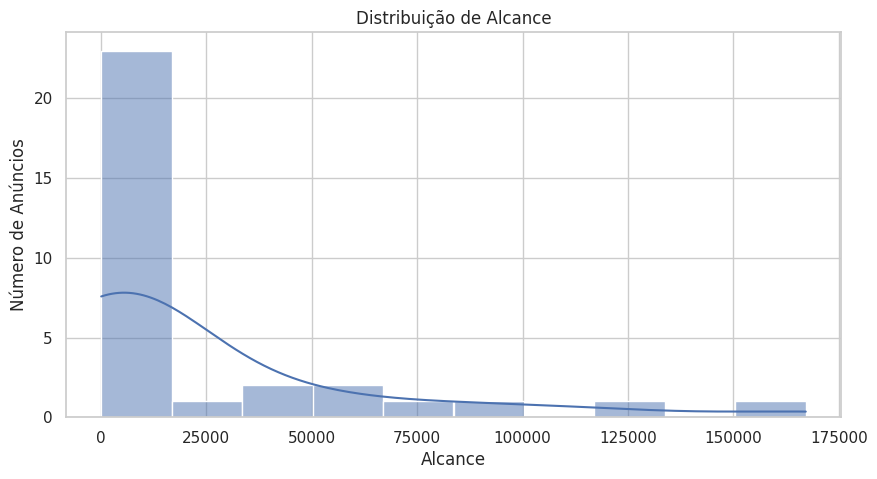

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Alcance"], kde=True)
plt.title("Distribuição de Alcance")
plt.xlabel("Alcance")
plt.ylabel("Número de Anúncios")
plt.show()

## Boxplot

Este gráfico mostra um "boxplot" do custo por resultado dos anúncios, ou seja, quanto foi gasto, em média, para cada ação desejada (como cliques ou conversões). A caixa representa o intervalo em que a maioria dos custos se concentra, entre aproximadamente 1 e 6. Há alguns pontos fora da caixa (chamados "outliers"), indicando anúncios com custo por resultado significativamente mais alto, entre 10 e 12.

**Insight**: A maioria dos anúncios teve um custo por resultado relativamente baixo, mas alguns estão custando muito mais para gerar resultados. Isso pode indicar que esses anúncios de alto custo precisam de ajustes para serem mais eficientes e alinhados ao custo médio da campanha.

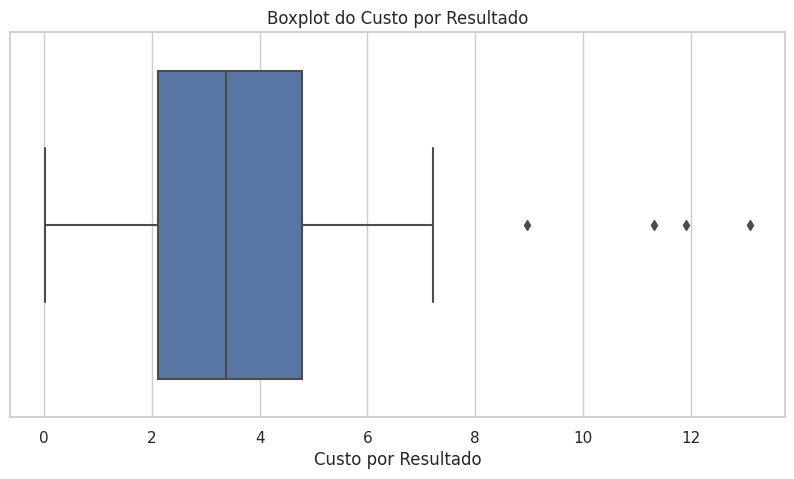

In [10]:
# Filtrar dados para remover custo por resultado igual a 0 ou NaN
df_filtrado = df[(df["Custo por resultado"] > 0) & (df["Custo por resultado"].notna())]

# Criar o boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x="Custo por resultado", data=df_filtrado)
plt.title("Boxplot do Custo por Resultado")
plt.xlabel("Custo por Resultado")
plt.show()


# Visualização das Distribuições do Custo por Resultado e Número de Anúncios"

## Histograma

Este gráfico mostra a distribuição do custo por resultado dos anúncios, ou seja, quantos anúncios estão em diferentes faixas de custo por ação gerada. A maioria dos anúncios tem um custo por resultado entre 2 e 6 unidades, com picos próximos de 4 unidades. Apenas alguns anúncios apresentam custos mais elevados, acima de 10.

**Insight**: A maioria dos anúncios está com um custo por resultado em uma faixa relativamente controlada, mas há alguns com custos elevados. Esses anúncios mais caros devem ser revisados para identificar oportunidades de redução de custo e melhorar o retorno sobre o investimento.

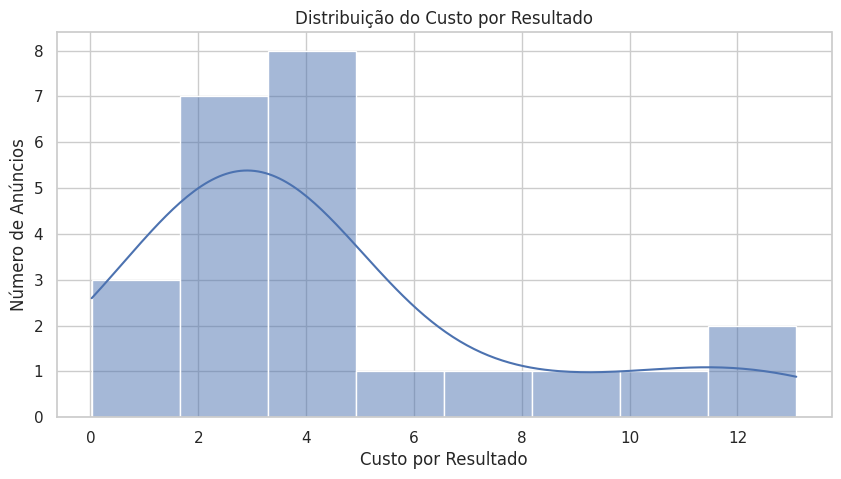

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Custo por resultado"], kde=True)
plt.title("Distribuição do Custo por Resultado")
plt.xlabel("Custo por Resultado")
plt.ylabel("Número de Anúncios")
plt.show()

# Análise de Relação entre CTR e Resultados

#### Gráfico de dispersão (scatter plot) 

Este gráfico mostra a relação entre o CTR (Click-Through Rate) calculado e os resultados (ações geradas) dos anúncios. Observamos que, na maioria dos casos, o CTR calculado é baixo (entre 0 e 0,2), mas ainda assim, alguns desses anúncios geram um alto número de resultados, chegando a mais de 100.000. Poucos anúncios têm CTR mais alto, mas, mesmo assim, os resultados gerados são baixos.

**Insight**: Esse gráfico sugere que um CTR mais alto não está necessariamente correlacionado com um número maior de resultados. Fatores além do CTR, como segmentação e qualidade do público-alvo, podem estar influenciando os resultados. É importante analisar outros elementos das campanhas para otimizar o desempenho.

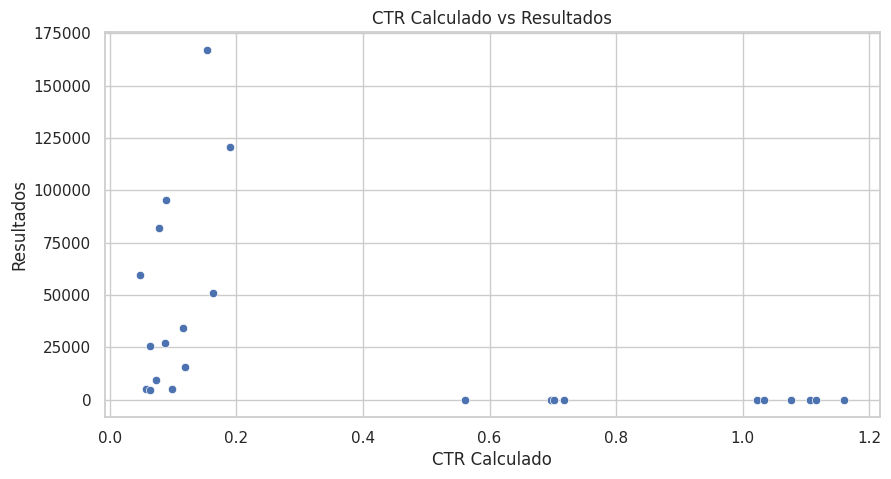

In [12]:
# Scatter plot de CTR calculado vs Resultados para avaliar relação
plt.figure(figsize=(10, 5))
sns.scatterplot(x="CTR", y="Resultados", data=df)
plt.title("CTR Calculado vs Resultados")
plt.xlabel("CTR Calculado")
plt.ylabel("Resultados")
plt.show()

#### Mapa de Calor (heatmap)

Este gráfico de densidade mostra a relação entre o CTR (Click-Through Rate) calculado e os resultados (ações geradas) dos anúncios. As áreas mais escuras indicam onde a maioria dos dados está concentrada. Observa-se que a maioria dos anúncios está agrupada em uma faixa de CTR próximo a 0 e resultados em torno de 50.000. 

**Insight**: A concentração de anúncios em CTR baixo com resultados significativos sugere que, para esse conjunto de dados, o CTR não é o único fator que influencia os resultados. É importante investigar outros aspectos da campanha que possam estar impactando o desempenho, como segmentação e qualidade criativa.

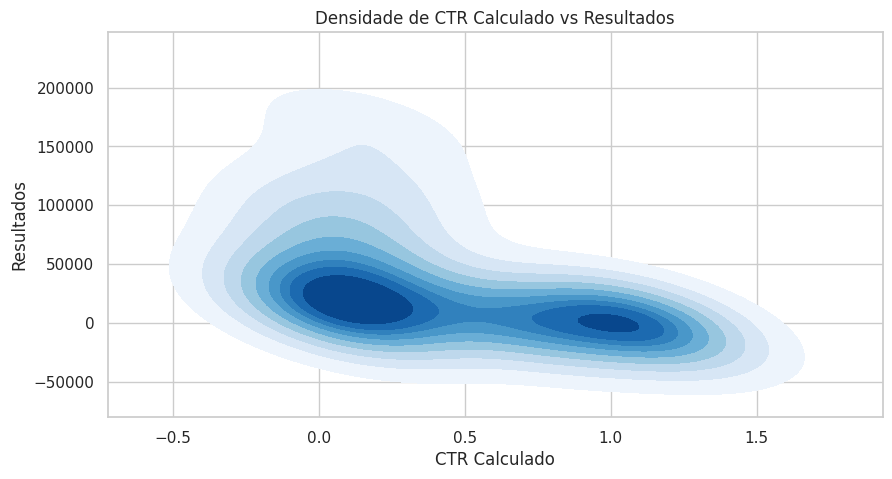

In [13]:
# Mapa de calor de densidade para CTR Calculado vs Resultados
plt.figure(figsize=(10, 5))
sns.kdeplot(x="CTR", y="Resultados", data=df, cmap="Blues", fill=True)
plt.title("Densidade de CTR Calculado vs Resultados")
plt.xlabel("CTR Calculado")
plt.ylabel("Resultados")
plt.show()

Os dois gráficos juntos reforçam a interpretação de que um CTR alto não é, por si só, um indicador forte de resultados elevados neste conjunto de dados. Outras variáveis, como segmentação, orçamento ou o tipo de campanha, podem estar influenciando mais diretamente os resultados.

Esses insights sugerem que vale a pena explorar outros fatores além do CTR para otimizar os resultados dos anúncios.

# Análise de Correlação entre Métricas

## Matriz de Correlação

**Intenção do Gráfico**: Esta matriz de correlação mostra como diferentes métricas de desempenho de anúncios se relacionam entre si, indicando quais variáveis aumentam ou diminuem juntas.

**Interpretações Pontuais**:
- **Alcance e Impressões**: Alta correlação (0,97) – quanto mais impressões, maior o alcance, como esperado.
- **Investimento (Valor usado) e Resultados**: Forte relação positiva (0,80) – mais investimento geralmente gera mais resultados.
- **CPM e Alcance**: Correlação negativa (-0,62) – um CPM mais alto tende a reduzir o alcance, provavelmente devido ao custo elevado por mil impressões.
- **Custo por Conversa e CPM (-0,79)**: Há uma forte correlação negativa entre custo por conversa e CPM, sugerindo que um CPM mais baixo ajuda a reduzir o custo por conversa.
- **CPC (todos)e Conversas por Mensagem Iniciada (0,77)**: Campanhas com CPC (todos)alto tendem a ter um custo maior para iniciar conversas, indicando que reduzir o CPC (todos)pode ajudar a baratear esse tipo de interação.
- **Frequência e Engajamento com a Página (0,53)**: A frequência tem uma relação moderada com o engajamento, indicando que mostrar o anúncio várias vezes pode aumentar o engajamento com a página, mas é importante não exagerar para evitar cansaço do público.

**Insights Valiosos**:
- **Foco no Investimento Eficiente**: Um maior investimento geralmente traz mais resultados, mas para otimizar, é essencial monitorar outras variáveis, como CTR e CPC (todos) (todos)   .
- **Atenção ao CPM**: Um CPM elevado pode limitar o alcance. Ajustar o público-alvo pode ajudar a equilibrar o custo e ampliar o alcance.
- **CTR e Conversão**: CTR sozinho não garante bons resultados. A qualidade do público e a página de destino precisam ser trabalhadas para transformar cliques em ações concretas.
- **Reduzir o CPC (todos)e CPM**: Para melhorar o custo de conversas e engajamentos, é importante otimizar o CPC (todos)e CPM, garantindo que mais cliques e interações sejam gerados com menor custo.
- **Monitorar Frequência**: Aumentar a frequência pode ser bom para engajamento, mas o equilíbrio é essencial para não cansar o público e manter um custo eficiente por interação.

Esses pontos destacam oportunidades para ajustar a estratégia de anúncios, focando em otimizar o alcance e reduzir os custos de conversão, ao mesmo tempo em que se equilibra a frequência para maximizar o engajamento sem saturar o público.

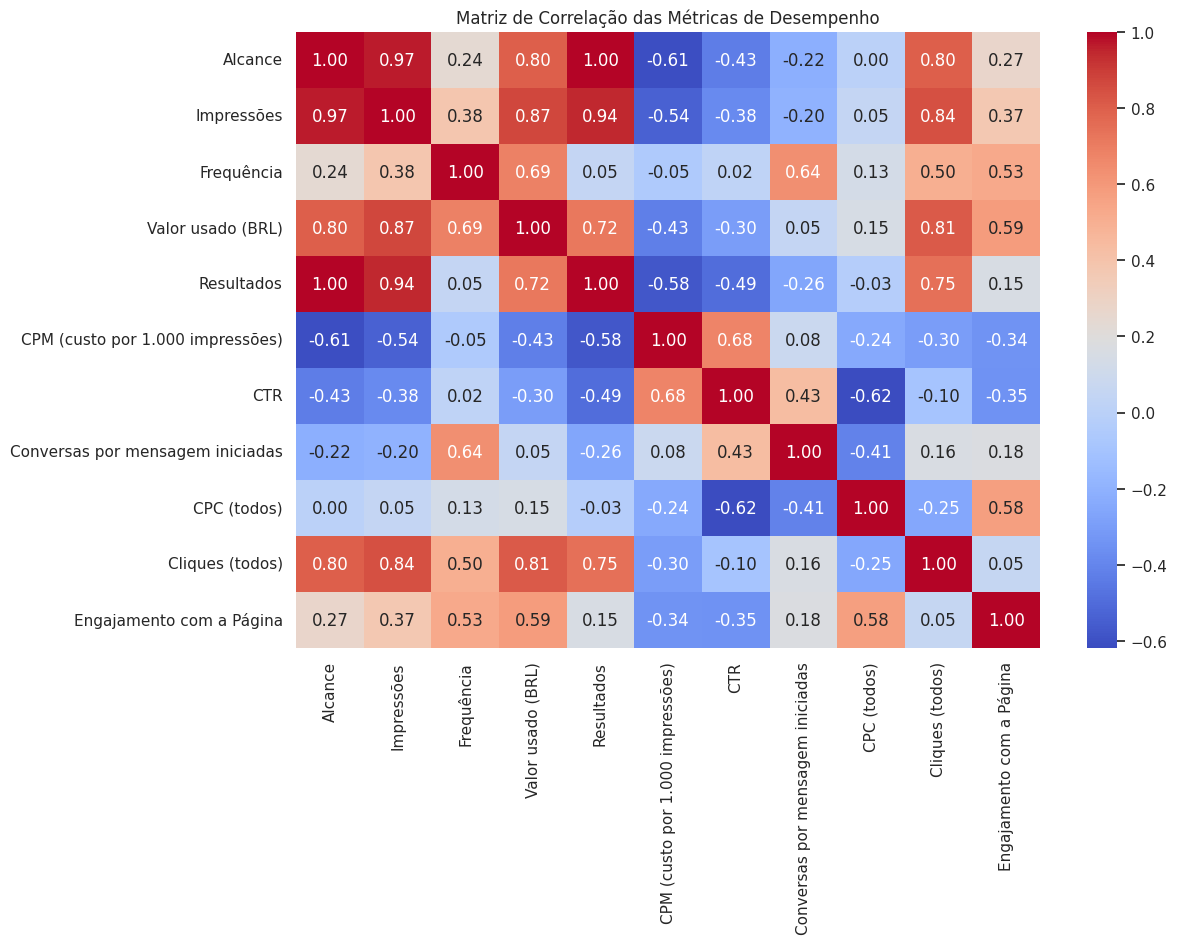

In [15]:
# Definindo as métricas principais para a análise
metricas_principais = [
    "Alcance",
    "Impressões",
    "Frequência",
    "Valor usado (BRL)",
    "Resultados",
    "CPM (custo por 1.000 impressões)",
    "CTR",
    "Conversas por mensagem iniciadas",
    "CPC (todos)",
    "Cliques (todos)",
    "Engajamento com a Página",
]

# Preparação dos dados para a matriz de correlação: conversão para numérico
for coluna in metricas_principais:
    df[coluna] = pd.to_numeric(df[coluna], errors="coerce")

# Cálculo da matriz de correlação e visualização
correlacao = df[metricas_principais].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Métricas de Desempenho")
plt.show()

# Identificação de Correlações Relevantes - CTR e Resultados

**CTR Calculado**: É a taxa de cliques, ou seja, quantas pessoas clicaram no anúncio em relação a quantas vezes ele foi exibido.

**Resultado**: Refere-se às ações que queremos alcançar com o anúncio, como vendas, leads ou outras conversões. O número -0,50 indica uma **correlação negativa moderada** entre esses dois fatores. Quando o CTR aumenta, o número de resultados (como vendas ou leads) tende a diminuir, e vice-versa. Isso é um pouco inesperado, porque normalmente, pensamos que mais cliques (CTR mais alto) levariam a mais resultados.


**Insight**: Esse dado sugere que, mesmo que muitos cliquem no anúncio, esses cliques não estão se transformando em ações que geram valor, como conversões. Isso pode acontecer porque o público talvez não seja o mais adequado ou porque algo na página de destino está fazendo as pessoas desistirem.


In [16]:
# Remover linhas com valores ausentes em 'CTR_calculado' ou 'Resultados'
df_corr = df[["CTR", "Resultados"]].dropna()

# Exemplo de correlação específica entre CTR calculado e Resultados
correlacao_ctr_resultados, _ = pearsonr(df_corr["CTR"], df_corr["Resultados"])
print(f"Correlação entre CTR calculado e Resultados: {correlacao_ctr_resultados:.2f}")

Correlação entre CTR calculado e Resultados: -0.49


# Recomendações para Reativação ou Criação de Novos Criativos